# Training our own model with 10 fruit images and a CNN keras

### Some libraries

In [0]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split
np.random.seed(1)

### Processing training images

In [0]:
# lists to agregate names and arrays images

train_img = []
train_lab = []
train_nam = []

In [0]:
# loop over dir´s

path = 'ftrain'

for name in os.listdir('ftrain'):
  for filename in os.listdir(f'ftrain/{name}'):
    if 'jpg' in filename:
      #print(name)
      img = cv2.imread(os.path.join(path,name,filename))
      #img = cv2.resize(img,(250,250))
      train_img.append(img)
      train_nam.append(str(name))
      

In [15]:
print(set(train_nam))
print(len(train_nam))

{'Pear', 'Blueberry', 'Strawberry', 'Avocado ripe', 'Potato White', 'Lemon', 'Orange', 'Pineapple', 'Raspberry', 'Onion Red Peeled', 'Pepper Green', 'Apple Red Delicious', 'Banana', 'Cocos', 'Tomato'}
7386


In [0]:
# change name to numerical

def nam_to_num(lst):
  labels = []
  for name in lst:
    if 'Apple Red Delicious' == name: labels.append(0)
    elif 'Avocado ripe' == name:labels.append(1)
    elif 'Banana' == name:labels.append(2)
    elif 'Blueberry' == name:labels.append(3)
    elif 'Lemon' == name:labels.append(4)
    elif 'Onion Red Peeled' == name: labels.append(5)
    elif 'Orange' == name: labels.append(6)
    elif 'Pepper Green' == name: labels.append(7)
    elif 'Potato White' == name: labels.append(8)
    elif 'Tomato' == name: labels.append(9)
    elif 'Strawberry' == name: labels.append(10)
    elif 'Raspberry' == name: labels.append(11)
    elif 'Pineapple' == name: labels.append(12)
    elif 'Pear' == name: labels.append(13)
    elif 'Cocos' == name: labels.append(14)
  return labels


In [17]:
train_lab = nam_to_num(train_nam)
print(set(train_lab))
print(len(train_lab))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
7386


In [0]:
# convert labels to categorical and images to arr

train_img = np.array(train_img)
#train_lab = pd.get_dummies(train_lab).values

train_lab = to_categorical(train_lab)
#y_test = to_categorical(y_test)

In [19]:
train_lab[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [20]:
train_img[0].shape

(100, 100, 3)

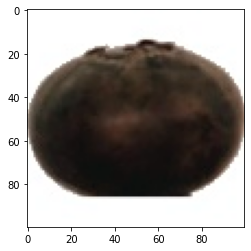

In [21]:
plt.imshow(train_img[0])

In [0]:
#X_train,X_test,y_train,y_test = train_test_split(train_img,train_lab,random_state=1)

### Same steps with test images set

In [0]:
test_img = []
test_lab = []
test_nam = []

path = 'ftest'

for name in os.listdir(path):
  for filename in os.listdir(f'ftest/{name}'):
    if 'jpg' in filename:
      img = cv2.imread(os.path.join(path,name,filename))
      test_img.append(img)
      test_nam.append(str(name))



In [0]:
test_lab = nam_to_num(test_nam)



In [0]:
test_lab = to_categorical(test_lab)

test_img = np.array(test_img)

In [25]:
print(len(test_img))
print(len(test_lab))

2450
2450


### Building the Convolutional Neural Networck

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size = 3, activation='tanh', input_shape=(100,100,3)))
model.add(Conv2D(filters=64, kernel_size = 3, activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=128, kernel_size = 3, activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=256, kernel_size = 3, activation='tanh'))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 256)      

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_img, train_lab, validation_data=(test_img, test_lab), epochs=5)

Train on 7386 samples, validate on 2450 samples
Epoch 1/5
7386/7386 [==============================] - 426s 58ms/step - loss: 0.1737 - accuracy: 0.9540 - val_loss: 0.0600 - val_accuracy: 0.9788
Epoch 2/5
7386/7386 [==============================] - 426s 58ms/step - loss: 1.7810e-05 - accuracy: 1.0000 - val_loss: 0.0429 - val_accuracy: 0.9812
Epoch 3/5
7386/7386 [==============================] - 434s 59ms/step - loss: 1.2050e-05 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 0.9935
Epoch 4/5
7386/7386 [==============================] - 428s 58ms/step - loss: 8.2680e-06 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 0.9890
Epoch 5/5
7386/7386 [==============================] - 432s 59ms/step - loss: 5.1963e-06 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 0.9890


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'uper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


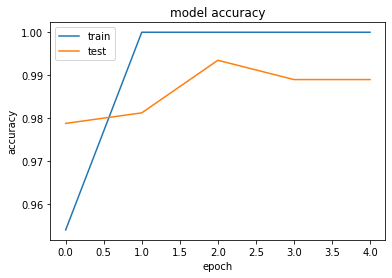

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'uper left')
plt.show();

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'uper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


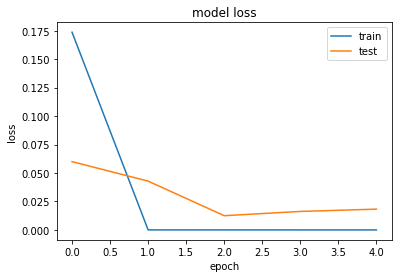

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'uper left')
plt.show();

In [34]:
checkImage = test_img[600:601]
checklabel = test_lab[600:601]

predict = model.predict(checkImage)

output = { 0:'apple',1:'avocado',2:'banana',3:'blueberry',4:'lemon',5:'onion red',6:'orange',7:'pepper green',8:'potato',9:'tomato',10:'strawberry',11:'raspberry',12:'pineapple',13:'pear',14:'coco'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Predicted :-  lemon


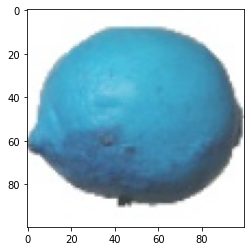

In [35]:
plt.imshow(test_img[600])

In [36]:
predict

array([[1.5777553e-19, 7.3095757e-23, 5.3412129e-16, 1.0902651e-25,
        1.0000000e+00, 5.6269250e-28, 9.3221835e-27, 6.3084968e-20,
        1.2924653e-08, 9.1555949e-26, 7.6833828e-20, 2.7722456e-29,
        8.5599727e-18, 1.8762179e-21, 3.8640845e-26]], dtype=float32)

### Model saving

In [0]:
# to read: import json  -  from keras.models import model_from_json, load_model
model.save_weights('model_weights15.h5')
with open('model_architecture15.json', 'w') as f:
    f.write(model.to_json())

In [0]:
model.save('nmodel15.h5')

## Trying some picture tests

### Fist test with a tomato

#### All this code is provided by google colab to deploy webcam function and take a picture

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

def take_photo(filename='photo2.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


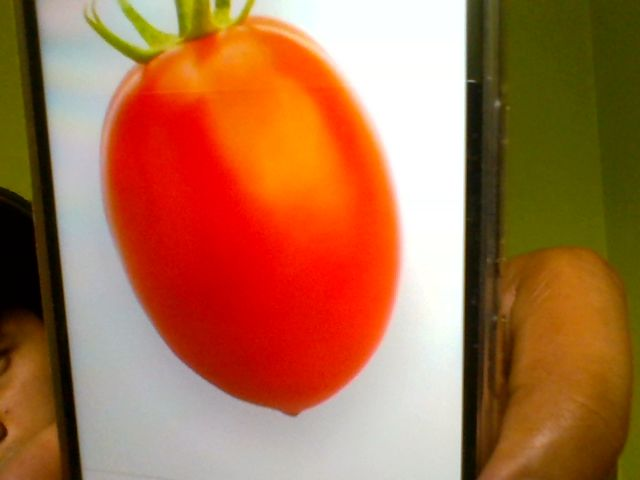

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

#### Code to load the model 

In [0]:
import json
from keras.models import model_from_json, load_model

In [0]:
with open('model_architecture15.json', 'r') as f:
    new_model_1 = model_from_json(f.read())
new_model_1.load_weights('model_weights15.h5')

In [45]:
photo = cv2.imread('photo.jpg')
img = cv2.resize(photo,(100,100))
image = np.expand_dims(img, axis=0)

predict = new_model_1.predict(image)

output = { 0:'apple',1:'avocado',2:'banana',3:'blueberry',4:'lemon',5:'onion red',6:'orange',7:'pepper green',8:'potato',9:'tomato',10:'strawberry',11:'raspberry',12:'pineapple',13:'pear',14:'coco'}

#print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Predicted :-  pineapple


### 2nd test with a banana

<IPython.core.display.Javascript object>

Saved to photo2.jpg


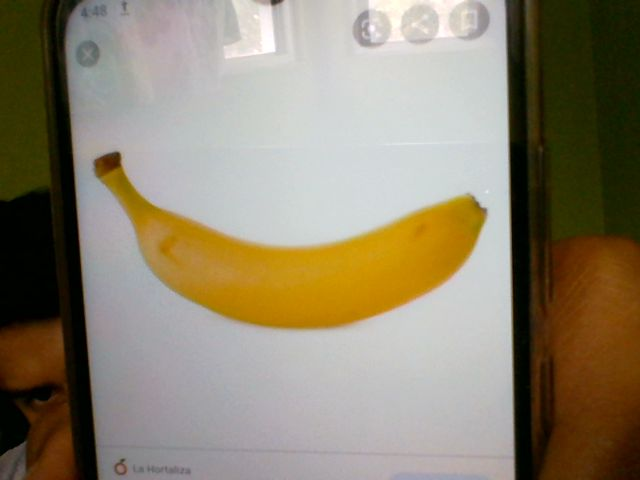

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode


def take_photo(filename='photo2.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image

try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [46]:
photo2 = cv2.imread('photo2.jpg')
img = cv2.resize(photo2,(100,100))
image = np.expand_dims(img, axis=0)

predict = new_model_1.predict(image)

output = { 0:'apple',1:'avocado',2:'banana',3:'blueberry',4:'lemon',5:'onion red',6:'orange',7:'pepper green',8:'potato',9:'tomato',10:'strawberry',11:'raspberry',12:'pineapple',13:'pear',14:'coco'}

#print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Predicted :-  banana
